# Visuals Examples:

- [Data Analysis](#data_ana)

## Data Analysis <a id='data_ana'></a>

In [51]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

from instrumentum.analysis.dashboards import dashboard_continuos_with_binary_target, dashboard_categorical_with_binary_target

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


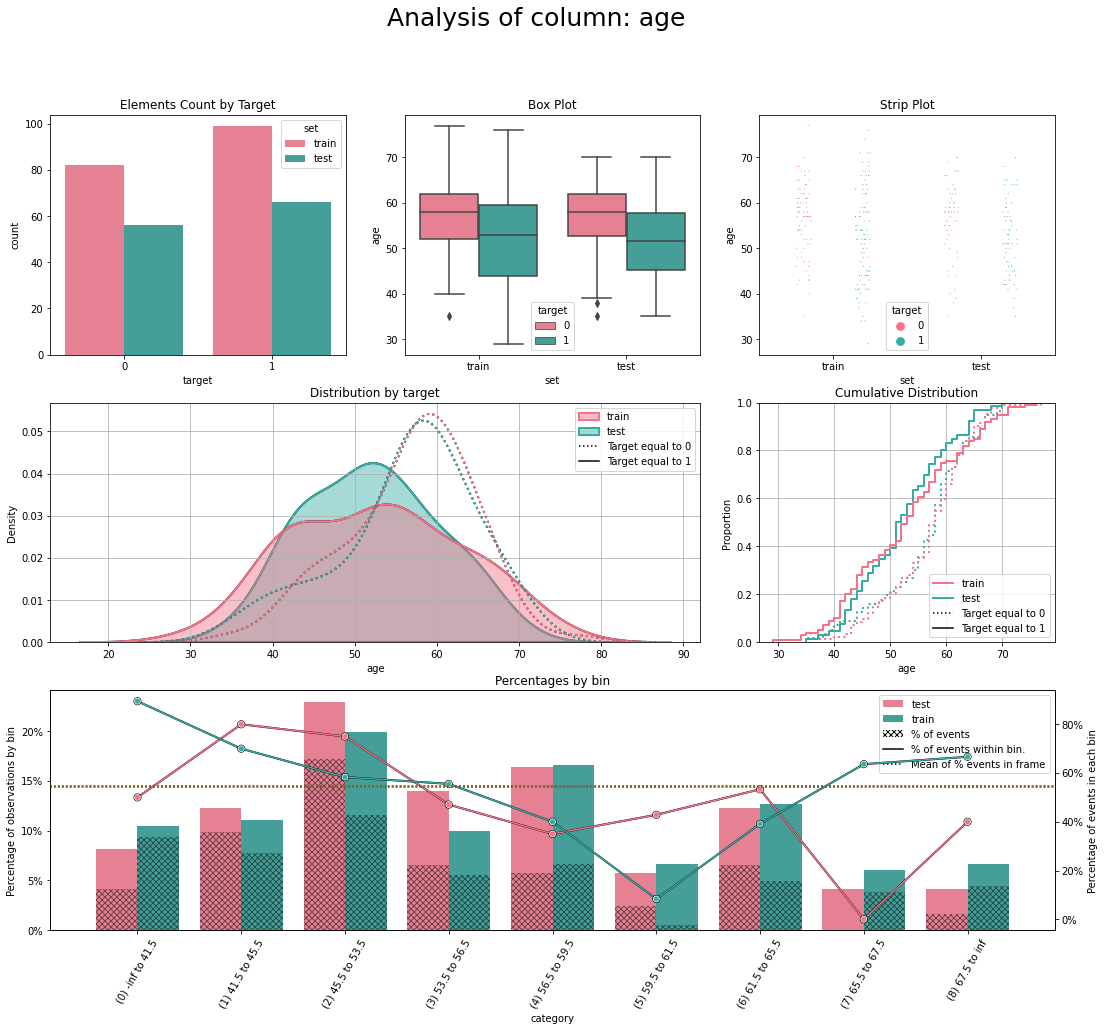

In [66]:
df = pd.read_csv("sample_data/heart.csv")
df_a, df_b = train_test_split(df, test_size=0.4)
df_a["set"], df_b["set"] = "train", "test"
df = pd.concat([df_a, df_b], axis=0)

dashboard_continuos_with_binary_target(df, x="age", y="target", cluster="set")
plt.show()

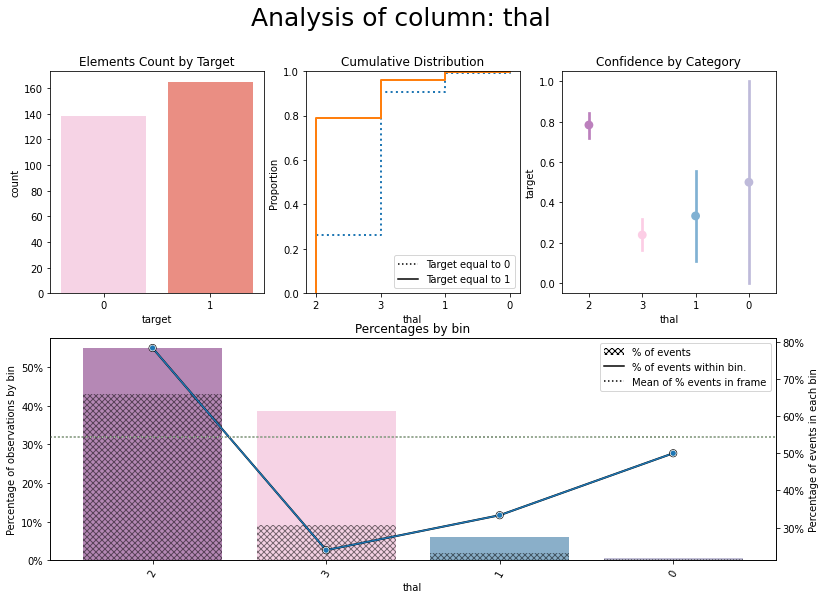

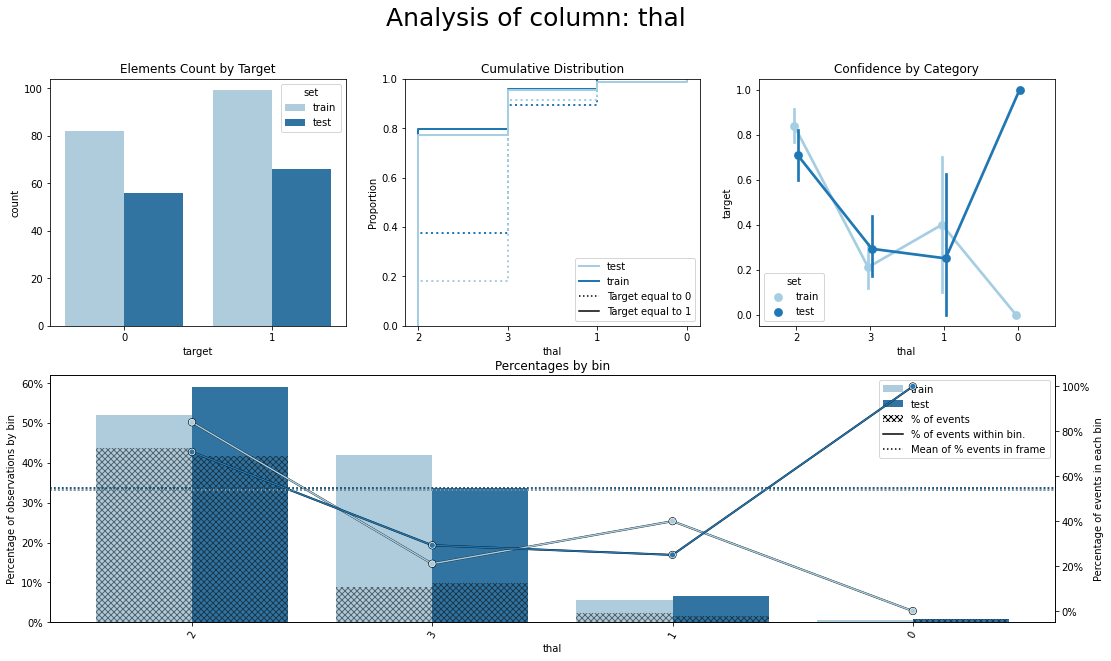

In [67]:
fig1 = dashboard_categorical_with_binary_target(df, x="thal", y="target", cluster=None, palette="Set3_r")
fig2 = dashboard_categorical_with_binary_target(df, x="thal", y="target", cluster="set", palette="Paired")

fig1.set_size_inches(13, 9)

plt.show()